Ce script cherche à expliquer par une animation simple le concept de convergence en économétrie : 

Convergence : diminution de la différence entre l’estimateur et la vraie valeur du paramètre à mesure que la taille de l’échantillon augmente : limn→∞ Pr (|ˆ θn − θ| > ε) = 0, ∀ε > 0

In [1]:
from manim import *

Manim Community v0.17.3

In [2]:
from manim import *

Concrétement, on cherche à reproduire et à animer ce graphique : 

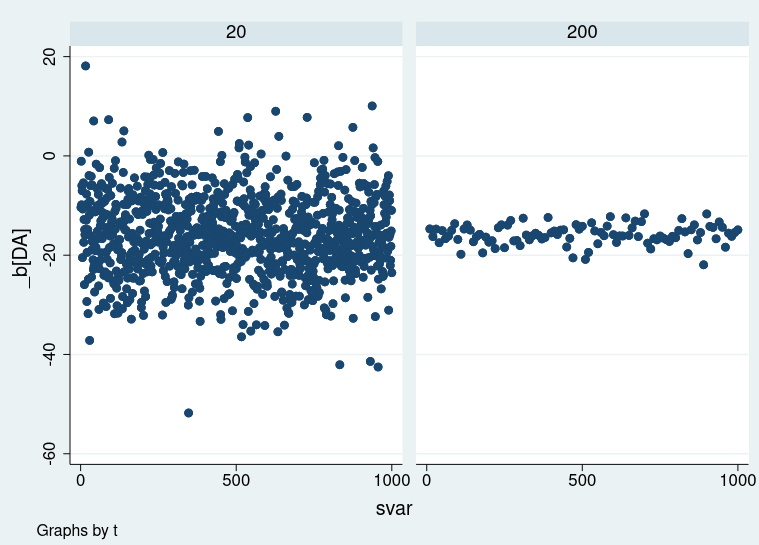

A gauche, on voit que quand on reproduit n fois l'expérience avec des échantillons de 20, on a une grande variation dans la moyenne; à droite, on le reproduit avec des échantillons de 200 : leur moyenne est beaucoup plus proche de la vraie valeur du paramètre. 

On pourrait suivre ce qu'on a fait en TP : 

* produire un estimateur
** d'abord une valeur par une valeur 
** puis des échantillons de 20 
** puis calculer la moyenne avec une nouvelle couleur
* montrer qu'on affiche plein de fois la valeur moyenne de l'échantillon
* faire évoluer le graphique au fur et à mesure qu'on augmente la taille de l'échantillon


## Produire un estimateur

### D'abord créer le graphique

In [3]:
%%manim -qm -v WARNING ScatterDiagram

from manim import *
import numpy as np

class ScatterDiagram(Scene):
    
    def graphique(self, anchor, graphique, num_points=20, temps_attente=0.1, rank=0, num_iter=5, show=True):
        
        point_texte = Dot([5, 2.5, 0])
        point_moyenne = Dot([-5, 2.5, 0])
        
        #texte_echantillon="Debut echantillon"
        #self.add(texte_echantillon)
        
        moyenne = []

        
        for i in range(0, num_points):

            y_point = np.random.normal(0, 1)

            texte = Text(f"y = {y_point:.2f}")
            texte.next_to(point_texte, UP, aligned_edge=RIGHT)
            # avg1 = Dot(grid_average.coords_to_point(-4,avg,0), color=YELLOW)
            point = Dot(anchor[0].coords_to_point(np.random.uniform(-5,5), y_point, 0), color=WHITE)
            moyenne.append(y_point)  # Ajoutez la valeur à la liste
            
            if show == True:
                anchor.add(point)  # Ajoutez le point et le texte au groupe
            
            
            self.add(anchor, texte)  # Ajoutez le groupe à la scène
            self.wait((3*temps_attente)/(rank+1))
            self.remove(texte)
            
        # Calculez la moyenne à partir de la liste
        avg = np.mean(moyenne)
        moy = Line(anchor[0].coords_to_point(-5, avg, 0), anchor[0].coords_to_point(5, avg, 0), stroke_width=2, color=YELLOW)
        texte_moyenne = Text(f"y = {avg:.2f}", color=YELLOW)
        texte_moyenne.next_to(point_moyenne, UP, aligned_edge=LEFT)
        avg1 = Dot(graphique[0].coords_to_point(np.random.uniform(-5,5),avg,0), color=YELLOW)

        self.add(moy, texte_moyenne)
        self.add(moy)
        graphique.add(avg1)


        self.wait()
        #self.play(FadeOut(moy,texte_moyenne, *filter(lambda obj: isinstance(obj, Dot), anchor)))
        #self.remove(moy, texte_moyenne, *filter(lambda obj: isinstance(obj, Dot), anchor))
            
            
        anchor.remove(moy, texte_moyenne, *filter(lambda obj: isinstance(obj, Dot), anchor))
    
        
        
        self.remove(moy, texte_moyenne, *filter(lambda obj: isinstance(obj, Dot), anchor))
        self.wait()
    
    
    def convergence(self, grille, taille_echantillon, num_points):
        """
        Fonction qui génère un nuage de point composé 
        de valeur moyenne d'échantillon de taille taille_echantillon 
        de points de loi normale
        """
        
        nuage=VGroup()
        moyenne=[]
        
        for j in range(0, num_points):
            for i in range(0, taille_echantillon):

                y=np.random.normal(0,3)
                moyenne.append(y)

            avg = np.mean(moyenne)
            point=Dot(grille[0].coords_to_point(np.random.uniform(-5,5),avg,0), color=YELLOW)
            #avg1 = Dot(graphique[0].coords_to_point(np.random.uniform(-5,5),avg,0), color=YELLOW)
            nuage.add(point)           
        
        return nuage
    
    
    def construct(self):
        # Créez une grille
        grid = NumberPlane(
            x_range=(-5, 5, 1),
            y_range=(-3, 3, 1),
            x_length=10,
            y_length=6,
            background_line_style={"stroke_opacity": 0.3},
        )

        # Ajoutez les axes et la grille à la scène
        self.add(grid)
        self.wait(0.5)

        # 
        point_texte = Dot([5, 2.5, 0])
        point_moyenne = Dot([-5, 2.5, 0])

        # Parametres
        num_points = 10
        temps_attente = 0.1
        num_iter=15


        # Utilisez une liste pour stocker les valeurs y_point
        moyenne = []

        # Créez un groupe pour les points
        echantillon_group = VGroup()
        echantillon_group.add(grid)

        # Animez les points un par un avec une durée d'apparition de 0.1 seconde
        for i in range(0, num_points):

            y_point = np.random.normal(0, 2)

            texte = Text(f"y = {y_point:.2f}")
            texte.next_to(point_texte, UP, aligned_edge=RIGHT)
            point = Dot([np.random.uniform(-5,5), y_point, 0], color=WHITE)
            moyenne.append(y_point)  # Ajoutez la valeur à la liste
            echantillon_group.add(point)  # Ajoutez le point et le texte au groupe
            
            self.add(echantillon_group, texte)  # Ajoutez le groupe à la scène
            self.wait(temps_attente)
            self.remove(texte)

        # Calculez la moyenne à partir de la liste
        avg = np.mean(moyenne)
        moy = Line([-5, avg, 0], [5, avg, 0], stroke_width=2, color=YELLOW)
        texte_moyenne = Text(f"y = {avg:.2f}", color=YELLOW)
        texte_moyenne.next_to(point_moyenne, UP, aligned_edge=LEFT)

        self.play(FadeIn(moy, texte_moyenne))
        echantillon_group.add(moy)
        self.wait()
        #self.play(FadeOut(moy))
        
        scale=0.65

        self.play(
            #grid.animate.scale(scale),
            echantillon_group.animate.scale(scale)  # Animez le groupe de points
        )
        self.play(
            #grid.animate.to_corner(LEFT),
            echantillon_group.animate.to_corner(LEFT)
        )
        
        ## Deuxieme diagramme
        
        graphique=VGroup()
        
        grid_average = NumberPlane(
            x_range=(-5, 5, 1),
            y_range=(-3, 3, 1),
            x_length=10*scale,
            y_length=6*scale,
            background_line_style={"stroke_opacity": 0.3},
        )
        
        
        grid_average.to_corner(RIGHT)
        
        graphique.add(grid_average)
        self.play(FadeIn(graphique))
        
        avg1 = Dot(graphique[0].coords_to_point(-4,avg,0), color=YELLOW)
        graphique.add(avg1)
        
        self.wait(3)
        
        ## boucler la derniere etape pour faire apparaitre tous les points
        
        self.remove(moy, *filter(lambda obj: isinstance(obj, Dot), echantillon_group)) #ICI JE SOUHAITE RETIRER LES POINTS ET LA MOYENNE
        echantillon_group.remove(*filter(lambda obj: isinstance(obj, Dot), echantillon_group), moy)
        self.wait()
        self.remove(texte_moyenne)
        
        
        for i in range(0, num_iter):
            self.graphique(echantillon_group, graphique,  num_points=num_points, rank=i, num_iter=num_iter)
        
        self.play(FadeOut(echantillon_group))
        self.play(graphique.animate.scale((1/scale)).to_corner(LEFT))
        #comment faire en sorte que graphique soit au centre et pas à droite ? 
        self.wait()
        
        self.remove(*filter(lambda obj: isinstance(obj, Dot), graphique)) #ICI JE SOUHAITE RETIRER LES POINTS ET LA MOYENNE

        
        n = []
        for i in range(1, 10):
            n.append(np.exp(((num_points*i)/10)))
        
        
        
        for taille_echantillon in n:
            print(taille_echantillon)
            nuage=self.convergence(graphique, int(taille_echantillon), num_points=num_points)
            
            texte_echantillon=Text(f"y = {taille_echantillon:.2f}", color=YELLOW)
            texte_echantillon.next_to(point_texte, UP, aligned_edge=RIGHT)
            
            
            
            self.add(nuage, texte_echantillon)
            self.wait()
            self.remove(nuage, texte_echantillon)
            
        self.wait(3)

2.718281828459045
7.38905609893065
20.085536923187668
54.598150033144236
148.4131591025766
403.4287934927351
1096.6331584284585
2980.9579870417283
8103.083927575384


In [4]:
%%manim -qm -v WARNING ScatterDiagram

from manim import *
import numpy as np

class ScatterDiagram(Scene):
    
    def graphique(self, anchor, graphique, num_points=20, temps_attente=0.1, rank=0, num_iter=5, show=True):
        
        point_texte = Dot([5, 2.5, 0])
        point_moyenne = Dot([-5, 2.5, 0])
        
        #texte_echantillon="Debut echantillon"
        #self.add(texte_echantillon)
        
        moyenne = []

        
        for i in range(0, num_points):

            y_point = np.random.normal(0, 1)

            texte = Text(f"y = {y_point:.2f}", size=12)  # Adjust the size value as needed
            texte.next_to(point_texte, UP, aligned_edge=RIGHT)
            # avg1 = Dot(grid_average.coords_to_point(-4,avg,0), color=YELLOW)
            point = Dot(anchor[0].coords_to_point(np.random.uniform(-5,5), y_point, 0), color=WHITE)
            moyenne.append(y_point)  # Ajoutez la valeur à la liste
            
            if show == True:
                anchor.add(point)  # Ajoutez le point et le texte au groupe
            
            
            self.add(anchor, texte)  # Ajoutez le groupe à la scène
            self.wait((3*temps_attente)/(rank+1))
            self.remove(texte)
            
        # Calculez la moyenne à partir de la liste
        avg = np.mean(moyenne)
        moy = Line(anchor[0].coords_to_point(-5, avg, 0), anchor[0].coords_to_point(5, avg, 0), stroke_width=2, color=YELLOW)
        texte_moyenne = Text(f"y = {avg:.2f}", color=YELLOW)
        texte_moyenne.next_to(point_moyenne, UP, aligned_edge=LEFT)
        avg1 = Dot(graphique[0].coords_to_point(np.random.uniform(-5,5),avg,0), color=YELLOW)

        self.add(moy, texte_moyenne)
        self.add(moy)
        graphique.add(avg1)


        self.wait()
        #self.play(FadeOut(moy,texte_moyenne, *filter(lambda obj: isinstance(obj, Dot), anchor)))
        #self.remove(moy, texte_moyenne, *filter(lambda obj: isinstance(obj, Dot), anchor))
            
            
        anchor.remove(moy, texte_moyenne, *filter(lambda obj: isinstance(obj, Dot), anchor))
    
        
        
        self.remove(moy, texte_moyenne, *filter(lambda obj: isinstance(obj, Dot), anchor))
        self.wait()
    
    
    def convergence(self, grille, taille_echantillon, num_points):
        """
        Fonction qui génère un nuage de point composé 
        de valeur moyenne d'échantillon de taille taille_echantillon 
        de points de loi normale
        """
        
        nuage=VGroup()
        moyenne=[]
        
        for j in range(0, num_points):
            for i in range(0, taille_echantillon):

                y=np.random.normal(0,3)
                moyenne.append(y)

            avg = np.mean(moyenne)
            point=Dot(grille[0].coords_to_point(np.random.uniform(-5,5),avg,0), color=YELLOW)
            #avg1 = Dot(graphique[0].coords_to_point(np.random.uniform(-5,5),avg,0), color=YELLOW)
            nuage.add(point)           
        
        return nuage
    
    
    def construct(self):
        # Créez une grille
        grid = NumberPlane(
            x_range=(-5, 5, 1),
            y_range=(-3, 3, 1),
            x_length=10,
            y_length=6,
            background_line_style={"stroke_opacity": 0.3},
        )

        # Ajoutez les axes et la grille à la scène
        self.add(grid)
        self.wait(0.5)

        # 
        point_texte = Dot([5, 2.5, 0])
        point_moyenne = Dot([-5, 2.5, 0])

        # Parametres
        num_points = 20
        temps_attente = 0.1
        num_iter=100


        # Utilisez une liste pour stocker les valeurs y_point
        moyenne = []

        # Créez un groupe pour les points
        echantillon_group = VGroup()
        echantillon_group.add(grid)

        # Animez les points un par un avec une durée d'apparition de 0.1 seconde
        for i in range(0, num_points):

            y_point = np.random.normal(0, 2)

            texte = Text(f"y = {y_point:.2f}", size=12)  # Adjust the size value as needed
            texte.next_to(point_texte, UP, aligned_edge=RIGHT)
            point = Dot([np.random.uniform(-5,5), y_point, 0], color=WHITE)
            moyenne.append(y_point)  # Ajoutez la valeur à la liste
            echantillon_group.add(point)  # Ajoutez le point et le texte au groupe
            
            self.add(echantillon_group, texte)  # Ajoutez le groupe à la scène
            self.wait(temps_attente)
            self.remove(texte)

        # Calculez la moyenne à partir de la liste
        avg = np.mean(moyenne)
        moy = Line([-5, avg, 0], [5, avg, 0], stroke_width=2, color=YELLOW)
        texte_moyenne = Text(f"y = {avg:.2f}", color=YELLOW)
        texte_moyenne.next_to(point_moyenne, UP, aligned_edge=LEFT)

        self.play(FadeIn(moy, texte_moyenne))
        echantillon_group.add(moy)
        self.wait()
        #self.play(FadeOut(moy))
        
        scale=0.65

        self.play(
            #grid.animate.scale(scale),
            echantillon_group.animate.scale(scale)  # Animez le groupe de points
        )
        self.play(
            #grid.animate.to_corner(LEFT),
            echantillon_group.animate.to_corner(LEFT)
        )
        
        ## Deuxieme diagramme
        
        graphique=VGroup()
        
        grid_average = NumberPlane(
            x_range=(-5, 5, 1),
            y_range=(-3, 3, 1),
            x_length=10*scale,
            y_length=6*scale,
            background_line_style={"stroke_opacity": 0.3},
        )
        
        
        grid_average.to_corner(RIGHT)
        
        graphique.add(grid_average)
        self.play(FadeIn(graphique))
        
        avg1 = Dot(graphique[0].coords_to_point(-4,avg,0), color=YELLOW)
        graphique.add(avg1)
        
        self.wait(3)
        
        ## boucler la derniere etape pour faire apparaitre tous les points
        
        self.remove(moy, *filter(lambda obj: isinstance(obj, Dot), echantillon_group)) #ICI JE SOUHAITE RETIRER LES POINTS ET LA MOYENNE
        echantillon_group.remove(*filter(lambda obj: isinstance(obj, Dot), echantillon_group), moy)
        self.wait()
        self.remove(texte_moyenne)
        
        
        for i in range(0, num_iter):
            self.graphique(echantillon_group, graphique,  num_points=num_points, rank=i, num_iter=num_iter)
        
        self.play(FadeOut(echantillon_group))
        self.play(graphique.animate.scale((1/scale)).to_corner(LEFT))
        #comment faire en sorte que graphique soit au centre et pas à droite ? 
        self.wait()
        
        self.remove(*filter(lambda obj: isinstance(obj, Dot), graphique)) #ICI JE SOUHAITE RETIRER LES POINTS ET LA MOYENNE

        
        n = []
        for i in range(1, 10):
            n.append(np.exp(((num_points*i)/10)))
        
        
        
        for taille_echantillon in n:
            print(taille_echantillon)
            nuage=self.convergence(graphique, int(taille_echantillon), num_points=num_points)
            
            texte_echantillon=Text(f"y = {taille_echantillon:.2f}", color=YELLOW)
            texte_echantillon.next_to(point_texte, UP, aligned_edge=RIGHT)
            
            
            
            self.add(nuage, texte_echantillon)
            self.wait()
            self.remove(nuage, texte_echantillon)
            
        self.wait(3)

TypeError: Mobject.__init__() got an unexpected keyword argument 'size'

On peut maintenant imaginer deux graphiques : un à gauche et un à droite. A gauche, celui juste au dessus qui fait un tirage aléatoire et qui en calcule la valeur moyenne; à droite un scatter diagram qui stoke la valeur de cette moyenne, par un nouveau point jaune qui apparait en même temps que la ligne de moyenne

Objectif : avoir une grille, la rapeticire et la décaler sur la gauche

In [ ]:
%%manim -qm -v WARNING ContinuousMotion


class ContinuousMotion(Scene):
    def construct(self):
        func = lambda pos: np.sin(pos[0] / 2) * UR + np.cos(pos[1] / 2) * LEFT
        stream_lines = StreamLines(func, stroke_width=2, max_anchors_per_line=30)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(stream_lines.virtual_time / stream_lines.flow_speed)

